In [ ]:
library(datasets)
library(ggplot2)
library(magrittr) # needs to be run every time you start R and want to use %>%
library(dplyr)
library(ggrepel) 

In [37]:
install.packages('ggrepel')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [11]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


# Label

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


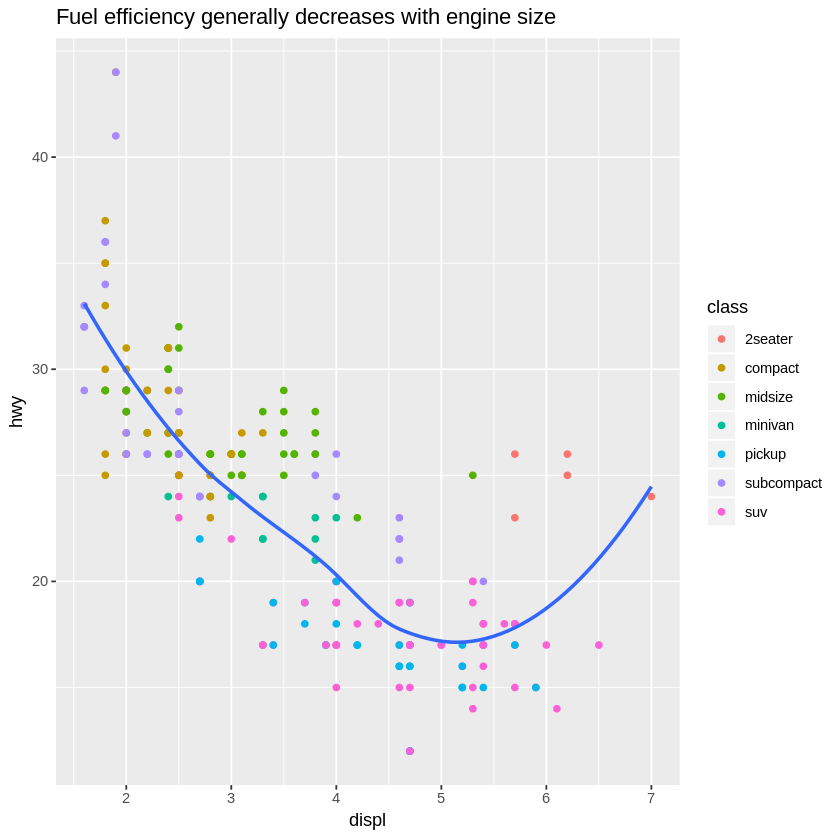

In [12]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) + 
  labs(title = "Fuel efficiency generally decreases with engine size")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


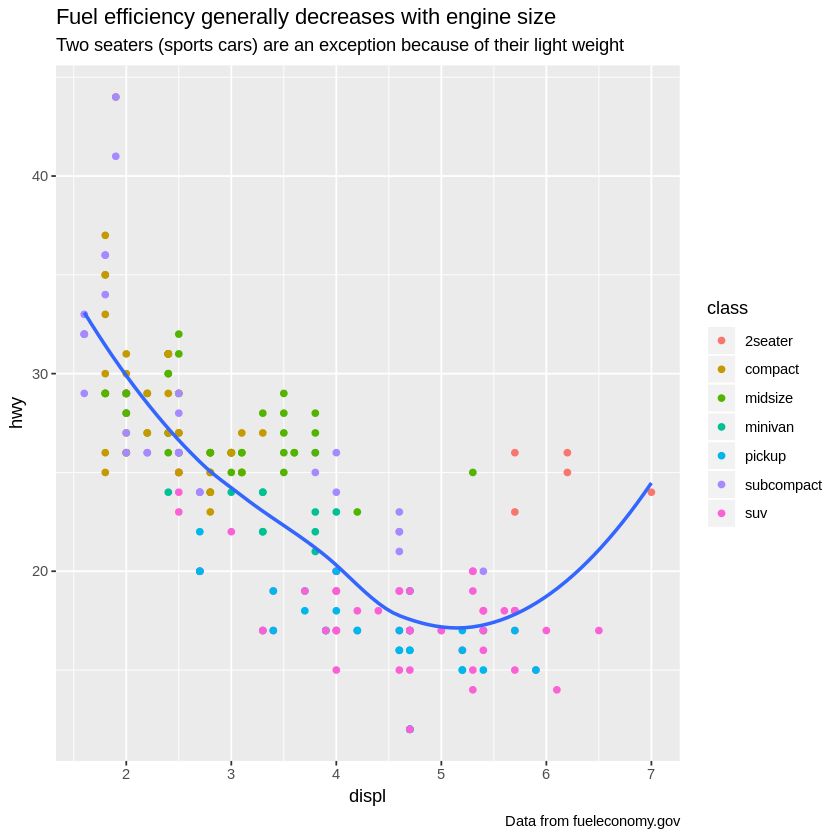

In [13]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  labs(
    title = "Fuel efficiency generally decreases with engine size",
    subtitle = "Two seaters (sports cars) are an exception because of their light weight",
    caption = "Data from fueleconomy.gov"
  )

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


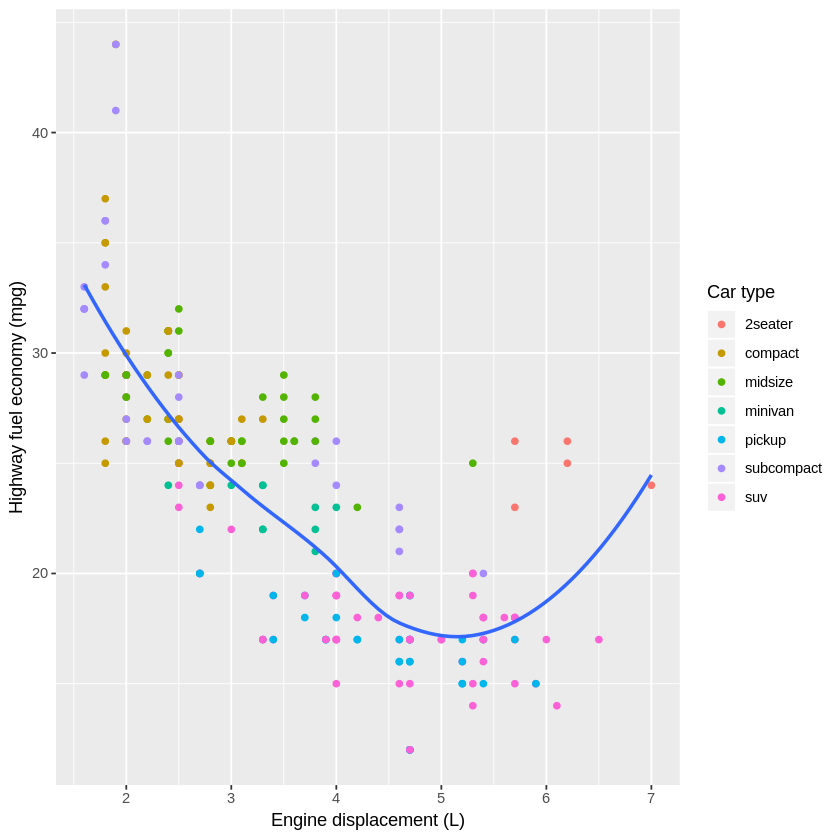

In [14]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_smooth(se = FALSE) +
  labs(
    x = "Engine displacement (L)",
    y = "Highway fuel economy (mpg)",
    colour = "Car type"
  )

# Annotations

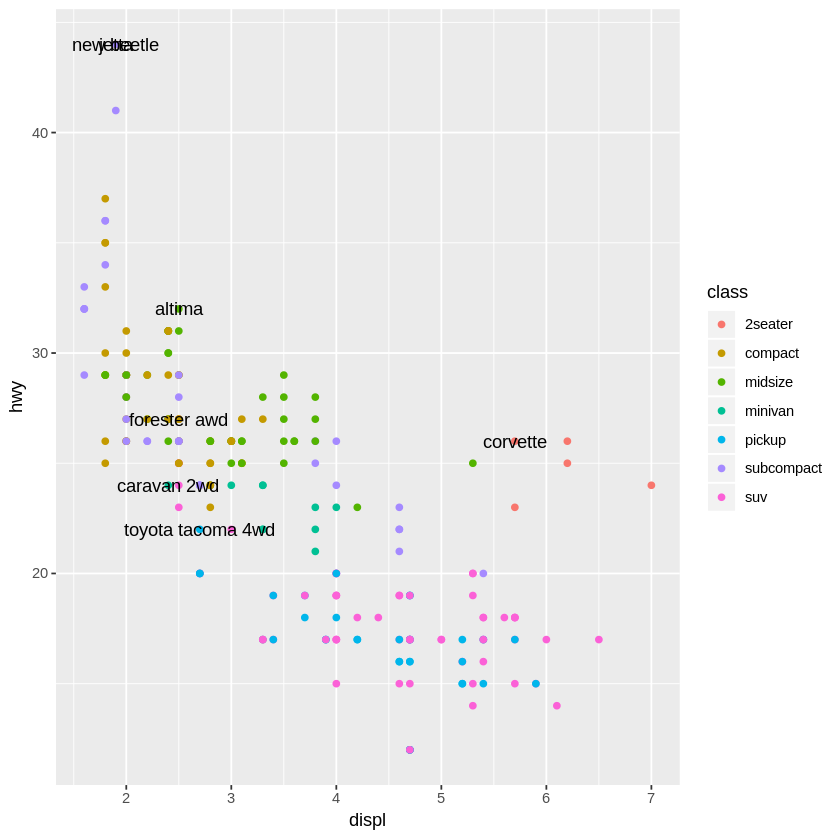

In [23]:
best_in_class <- mpg %>%
  group_by(class) %>%
  filter(row_number(desc(hwy)) == 1)

ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_text(aes(label = model), data = best_in_class)

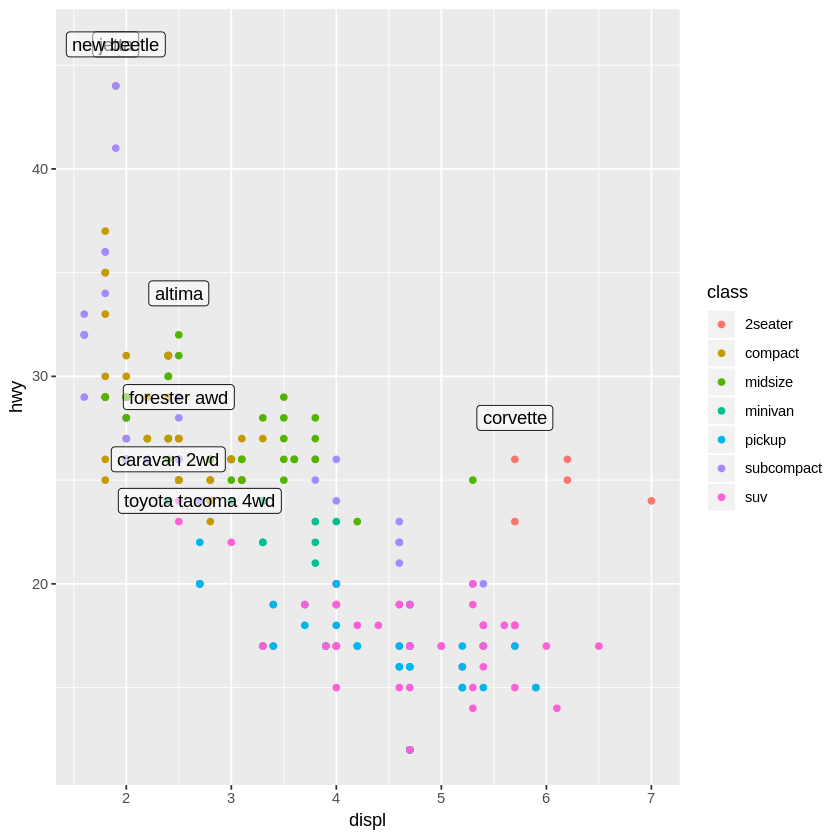

In [34]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_label(aes(label = model), data = best_in_class, nudge_y = 2, alpha = 0.5)

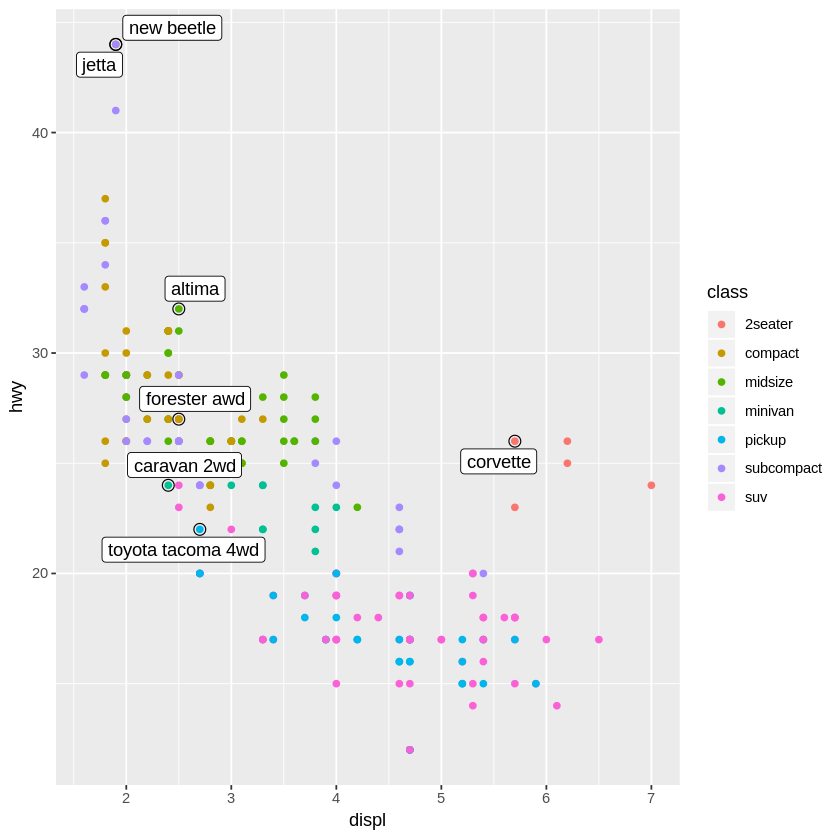

In [38]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(colour = class)) +
  geom_point(size = 3, shape = 1, data = best_in_class) +
  ggrepel::geom_label_repel(aes(label = model), data = best_in_class)

In [40]:
class_avg <- mpg %>%
  group_by(class) %>%
  summarise(
    displ = median(displ),
    hwy = median(hwy)
  )
class_avg

class,displ,hwy
2seater,6.20,25.0
compact,2.20,27.0
midsize,2.80,27.0
minivan,3.30,23.0
pickup,4.70,17.0
subcompact,2.20,26.0
suv,4.65,17.5


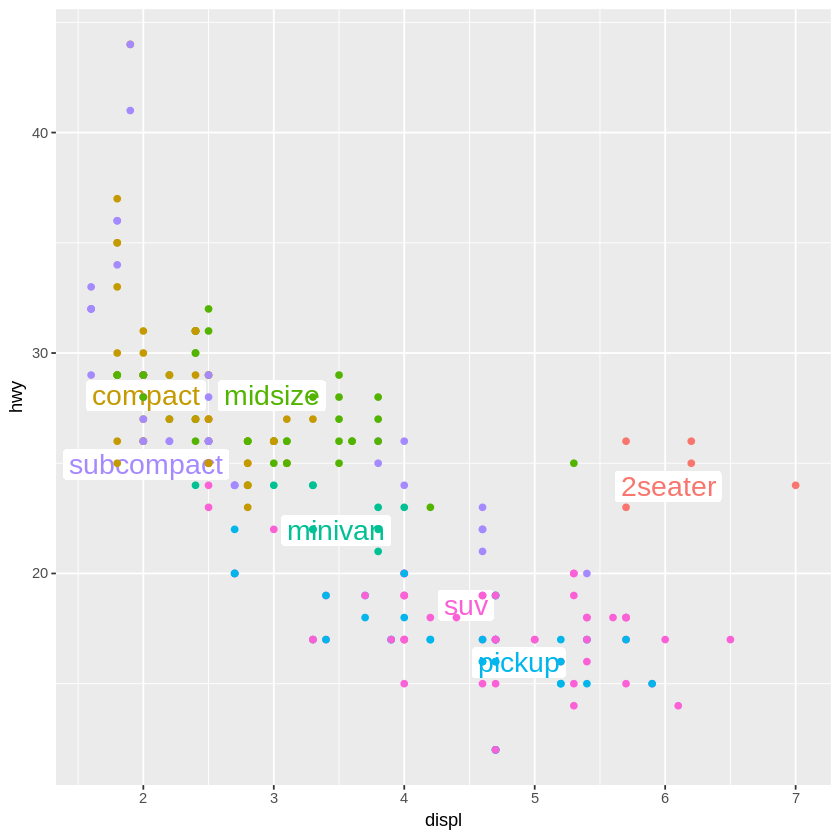

In [41]:
ggplot(mpg, aes(displ, hwy, colour = class)) +
  ggrepel::geom_label_repel(aes(label = class),
    data = class_avg,
    size = 6,
    label.size = 0,
    segment.color = NA
  ) +
  geom_point() +
  theme(legend.position = "none")

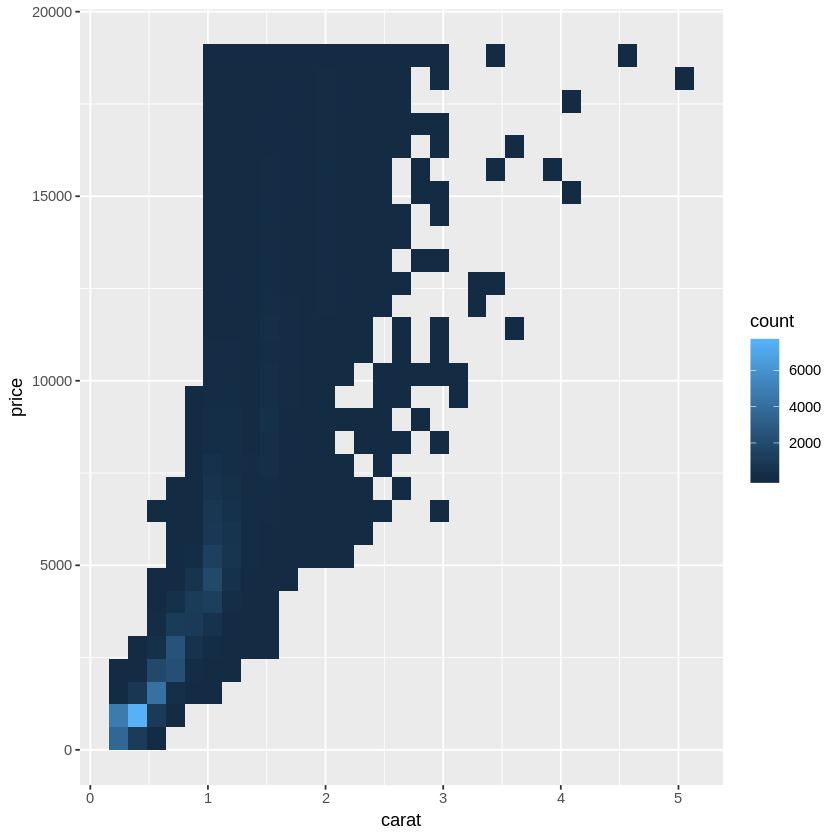

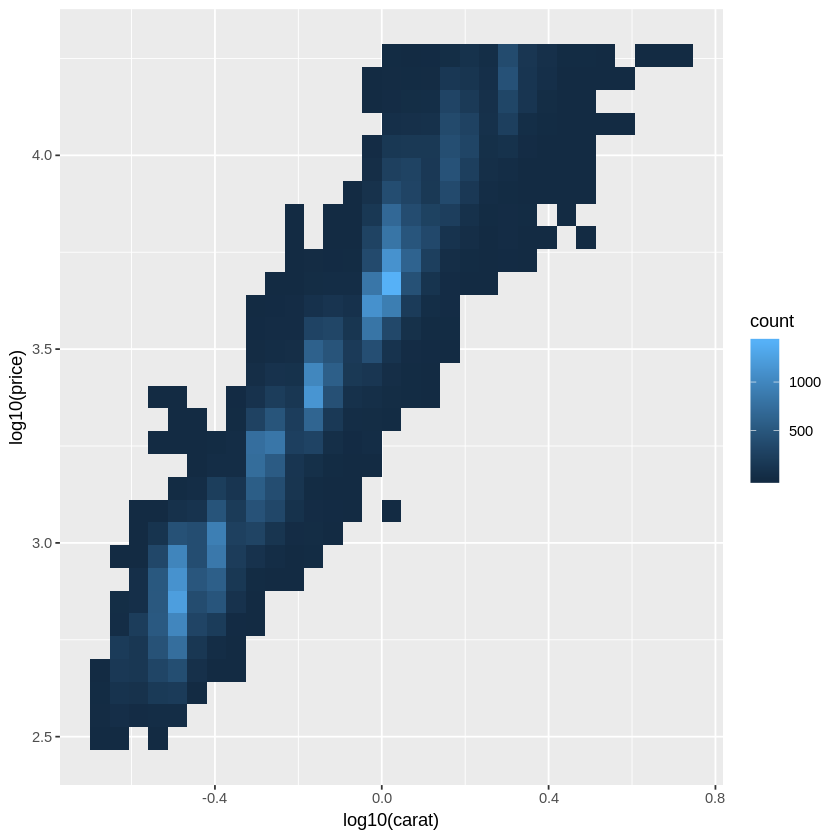

In [42]:
ggplot(diamonds, aes(carat, price)) +
  geom_bin2d()

ggplot(diamonds, aes(log10(carat), log10(price))) +
  geom_bin2d()

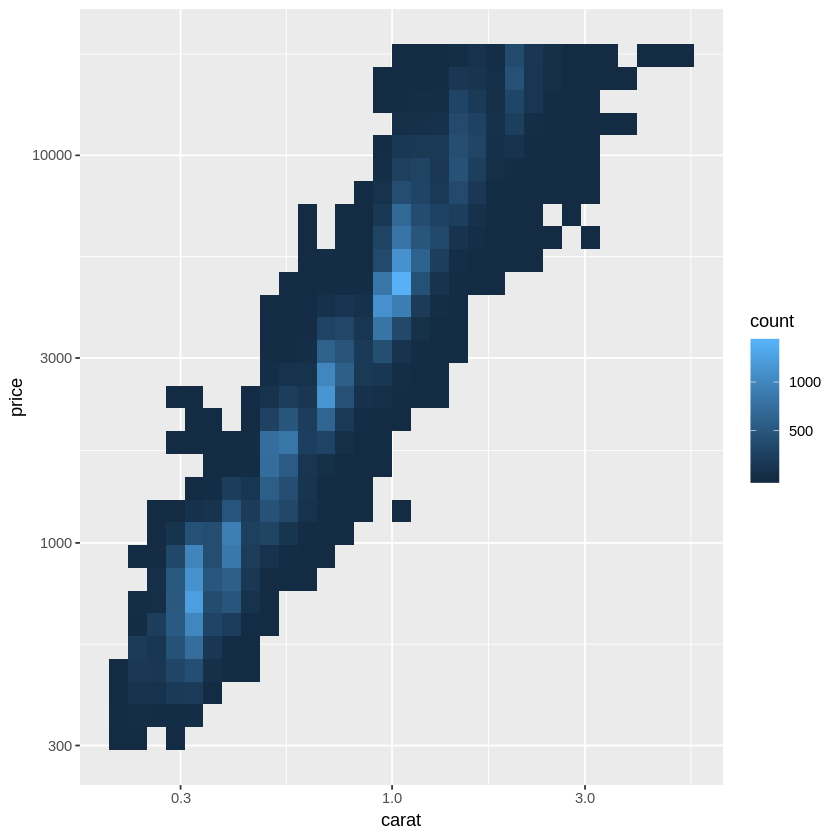

In [43]:
ggplot(diamonds, aes(carat, price)) +
  geom_bin2d() + 
  scale_x_log10() + 
  scale_y_log10()

# Themes

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


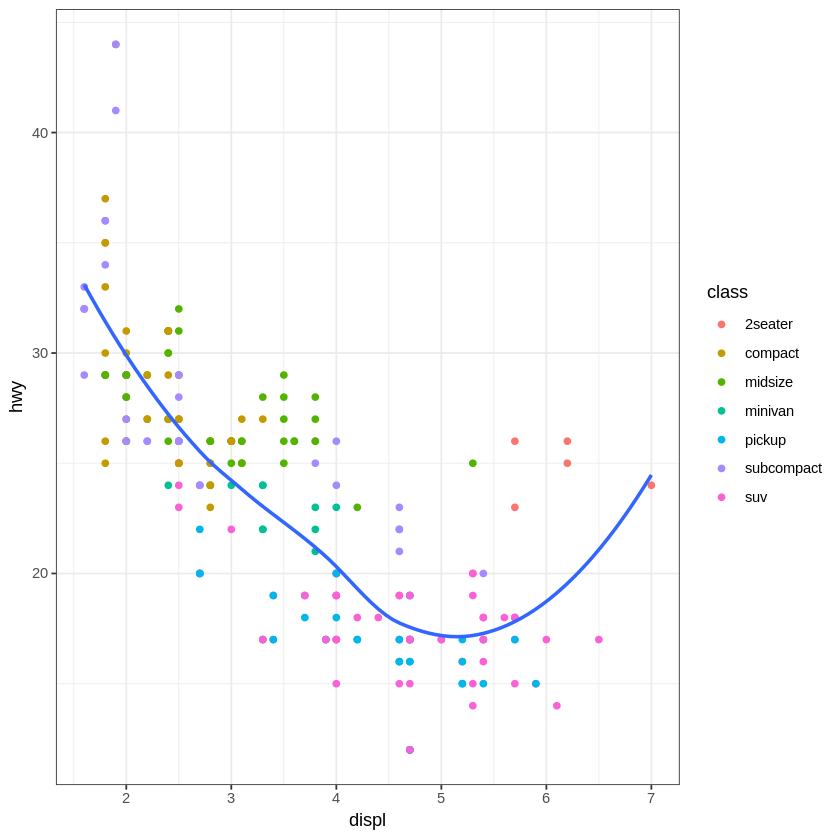

In [44]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(se = FALSE) +
  theme_bw()

# Saving your plots

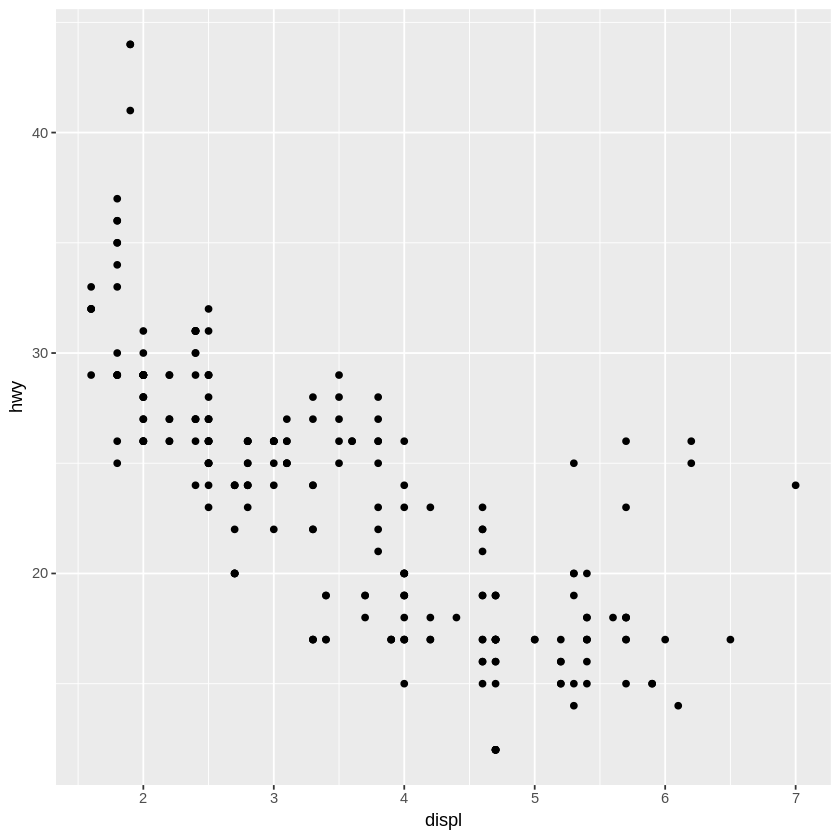

In [45]:
ggplot(mpg, aes(displ, hwy)) + geom_point()

In [46]:
ggsave("my-plot.pdf")

Saving 6.67 x 6.67 in image
